# Team 2: SeizeIt! Case Study Code

# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
import pulp
from scipy.optimize import minimize, Bounds
import statistics
sns.set()

In [2]:
df = pd.read_csv("customer_info_2020.csv")

In [3]:
df.head()

,age,expenditure,price
0,66,3761.73,30.5
1,34,2243.36,20.0
2,34,2388.02,30.5
3,27,1365.82,20.0
4,24,444.40,30.5


In [4]:
df.describe()

,age,expenditure,price
count,3731.000000,3731.000000,3731.000000
mean,33.656392,1889.727832,30.383409
std,11.484522,1264.837892,9.879384
min,18.000000,188.310000,20.000000
25%,25.000000,642.065000,20.000000
50%,33.000000,1915.040000,30.500000
75%,37.000000,2266.280000,35.000000
max,78.000000,8961.230000,60.000000


# A. Understanding Current Customers

## Distribution by Age Groups

Divide data into age groups: 18-29, 30-39, 40-49, Over 50.

In [5]:
# Change Age & Price into Categorical Variable
def age_func(x):
    if  x < 30:
        return '18-29'
    elif  x < 40:
        return '30-39'
    elif  x < 50:
        return '40-49'
    return 'Over 50'

df['Age_Group'] = df['age'].apply(age_func)

def price_func(x):
    if  x < 30:
        return '20-29'
    elif  x < 40:
        return '30-39'
    elif  x < 50:
        return '40-49'
    return '50-60'

df['Price_Group'] = df['price'].apply(price_func)

## Age Distribution by Count
Age group 18-29 represents 34% of customers, 30-39 representing 49% of customers. Age group 30-39 is also the most profitable group.

<function matplotlib.pyplot.show(close=None, block=None)>

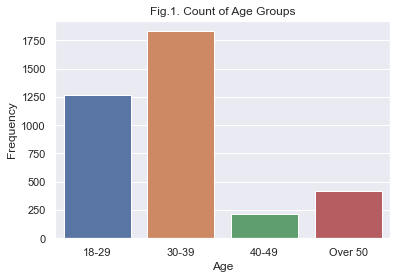

In [6]:
#Age Distribution by Count
age_order = ['18-29','30-39','40-49','Over 50'] 
sns.countplot(x="Age_Group", data=df, order=age_order)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Fig.1. Count of Age Groups')
plt.show

In [7]:
print('Total number of data: '+str(len(df['Age_Group'])))
print('Number of Age_Group 18-29: '+str(sum(df['Age_Group']=='18-29')))
print('Number of Age_Group 30-39: '+str(sum(df['Age_Group']=='30-39')))
print('Number of Age_Group 40-49: '+str(sum(df['Age_Group']=='40-49')))
print('Number of Age_Group Over 50: '+str(sum(df['Age_Group']=='Over 50')))

Total number of data: 3731
Number of Age_Group 18-29: 1266
Number of Age_Group 30-39: 1830
Number of Age_Group 40-49: 218
Number of Age_Group Over 50: 417


## Age Distribution by Total Expenditure

<function matplotlib.pyplot.show(close=None, block=None)>

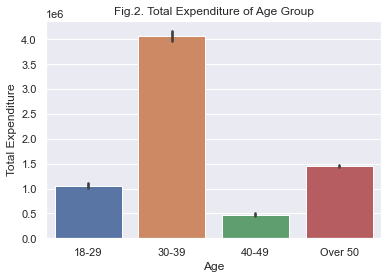

In [8]:
# Age Distribution by Total Expenditure
age_order = ['18-29','30-39','40-49','Over 50'] 
sns.barplot(x='Age_Group', 
            y='expenditure',
            data=df, 
            order=age_order,
            estimator=sum)
plt.xlabel('Age')
plt.ylabel('Total Expenditure')
plt.title('Fig.2. Total Expenditure of Age Group')
plt.show

In [9]:
print('Total Expenditure: '+str(sum(df['expenditure'])))
print('Number of Age_Group 18-29: '+str(sum(df[df['Age_Group']=='18-29']['expenditure'])))
print('Number of Age_Group 30-39: '+str(sum(df[df['Age_Group']=='30-39']['expenditure'])))
print('Number of Age_Group 40-49: '+str(sum(df[df['Age_Group']=='40-49']['expenditure'])))
print('Number of Age_Group Over 50: '+str(sum(df[df['Age_Group']=='Over 50']['expenditure'])))

Total Expenditure: 7050574.539999992
Number of Age_Group 18-29: 1058524.9500000014
Number of Age_Group 30-39: 4064894.9399999995
Number of Age_Group 40-49: 473036.2900000002
Number of Age_Group Over 50: 1454118.3599999994


<function matplotlib.pyplot.show(close=None, block=None)>

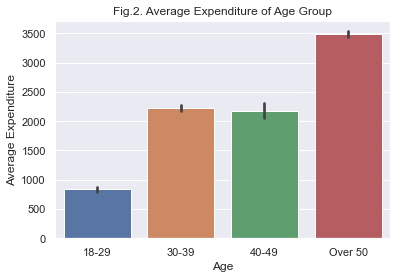

In [10]:
age_order = ['18-29','30-39','40-49','Over 50'] 
sns.barplot(x='Age_Group', 
            y='expenditure',
            data=df, 
            order=age_order,
            estimator=np.mean)
plt.xlabel('Age')
plt.ylabel('Average Expenditure')
plt.title('Fig.2. Average Expenditure of Age Group')
plt.show

In [11]:
print('Average Expenditure: '+str(np.mean(df['expenditure'])))
print('Number of Age_Group 18-29: '+str(np.mean(df[df['Age_Group']=='18-29']['expenditure'])))
print('Number of Age_Group 30-39: '+str(np.mean(df[df['Age_Group']=='30-39']['expenditure'])))
print('Number of Age_Group 40-49: '+str(np.mean(df[df['Age_Group']=='40-49']['expenditure'])))
print('Number of Age_Group Over 50: '+str(np.mean(df[df['Age_Group']=='Over 50']['expenditure'])))

Average Expenditure: 1889.7278316805146
Number of Age_Group 18-29: 836.1176540284359
Number of Age_Group 30-39: 2221.2540655737703
Number of Age_Group 40-49: 2169.89123853211
Number of Age_Group Over 50: 3487.0943884892085


## Price Distribution per Age Group

<function matplotlib.pyplot.show(close=None, block=None)>

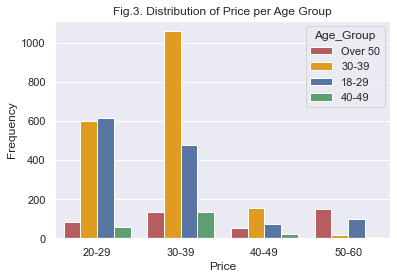

In [12]:
# Price Distribution per Age Group
price_order = ['20-29','30-39','40-49','50-60'] 
sns.countplot(x="Price_Group", hue="Age_Group", data=df, palette=['r','orange','b','g'], order = price_order)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Fig.3. Distribution of Price per Age Group')
plt.show

In [13]:
Average = df.groupby('Age_Group').agg({
    'price': ['sum','count','max','min']
})
Average['Average'] = Average['price']['sum']/Average['price']['count']

In [14]:
Average['Average']

Age_Group
18-29      28.637046
30-39      29.541803
40-49      30.745413
Over 50    39.189448
Name: Average, dtype: float64

In [15]:
Average['price']['max']

Age_Group
18-29      60.0
30-39      60.0
40-49      60.0
Over 50    60.0
Name: max, dtype: float64

In [16]:
Average['price']['min']

Age_Group
18-29      20.0
30-39      20.0
40-49      20.0
Over 50    20.0
Name: min, dtype: float64

# B. Basic Pricing

## Revenue vs. Price - All customers

In [17]:
x = []
y = []
z = []
exp = []
for i in np.arange(20,60.5,0.5):
    x.append(i)
    y.append(len(df[df['price']>=i]['age'])*i)
    z.append(len(df[df['price']>=i]['age']))
    exp.append(sum(df[df['price']>=i]['expenditure']))

<function matplotlib.pyplot.show(close=None, block=None)>

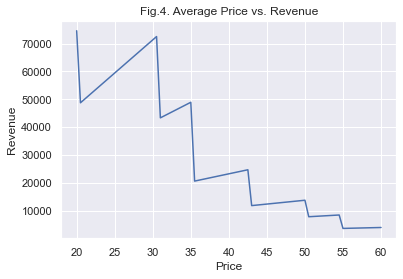

In [18]:
plt.plot(x,y)
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title('Fig.4. Average Price vs. Revenue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

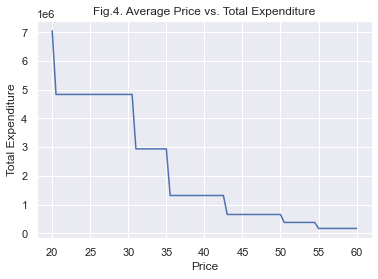

In [19]:
plt.plot(x,exp)
plt.xlabel('Price')
plt.ylabel('Total Expenditure')
plt.title('Fig.4. Average Price vs. Total Expenditure')
plt.show

Text(0.5, 1.0, 'Average Price vs. Total Expenditure')

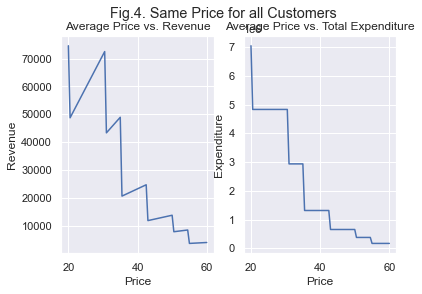

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Fig.4. Same Price for all Customers')

ax1.plot(x,y)
ax1.set_xlabel('Price')
ax1.set_ylabel('Revenue')
ax1.set_title('Average Price vs. Revenue')

ax2.plot(x,exp)
ax2.set_xlabel('Price')
ax2.set_ylabel('Expenditure')
ax2.set_title('Average Price vs. Total Expenditure')

In [21]:
price_revenue = pd.DataFrame({'Price':x, 'Revenue': y, '# of Cust':z, 'Total Expenditure':exp})
price_revenue.sort_values('Revenue',ascending=False).head(10)

,Price,Revenue,# of Cust,Total Expenditure
0,20.0,74620.0,3731,7050574.54
21,30.5,72529.0,2378,4832773.32
20,30.0,71340.0,2378,4832773.32
19,29.5,70151.0,2378,4832773.32
18,29.0,68962.0,2378,4832773.32
17,28.5,67773.0,2378,4832773.32
16,28.0,66584.0,2378,4832773.32
15,27.5,65395.0,2378,4832773.32
14,27.0,64206.0,2378,4832773.32
13,26.5,63017.0,2378,4832773.32


In [22]:
price_revenue[price_revenue['Price']==45]

,Price,Revenue,# of Cust,Total Expenditure
50,45.0,12375.0,275,652433.82


## Price vs. Revenue per Age Group

Age Group 18-29

In [23]:
x = []
y = []
z = []
exp = []
for i in np.arange(20,60.5,0.5):
    x.append(i)
    y.append(len(df[(df['price']>=i) & (df['Age_Group']=='18-29')])*i)
    z.append(len(df[(df['price']>=i) & (df['Age_Group']=='18-29')]))
    exp.append(sum(df[(df['price']>=i) & (df['Age_Group']=='18-29')]['expenditure']))
    
price_revenue_1829 = pd.DataFrame({'Price':x, 'Revenue': y, '# of Cust':z, 'Total Expenditure':exp})
price_revenue_1829.sort_values('Revenue',ascending=False).head(5)

,Price,Revenue,# of Cust,Total Expenditure
0,20.0,25320.0,1266,1058524.95
21,30.5,19855.5,651,605076.31
20,30.0,19530.0,651,605076.31
19,29.5,19204.5,651,605076.31
18,29.0,18879.0,651,605076.31


Age Group 30-39

In [24]:
x = []
y = []
z = []
exp = []
for i in np.arange(20,60.5,0.5):
    x.append(i)
    y.append(len(df[(df['price']>=i) & (df['Age_Group']=='30-39')])*i)
    z.append(len(df[(df['price']>=i) & (df['Age_Group']=='30-39')]))
    exp.append(sum(df[(df['price']>=i) & (df['Age_Group']=='30-39')]['expenditure']))
    
price_revenue_3039 = pd.DataFrame({'Price':x, 'Revenue': y, '# of Cust':z, 'Total Expenditure':exp})
price_revenue_3039.sort_values('Revenue',ascending=False).head(5)

,Price,Revenue,# of Cust,Total Expenditure
21,30.5,37606.5,1233,2722306.47
20,30.0,36990.0,1233,2722306.47
0,20.0,36600.0,1830,4064894.94
19,29.5,36373.5,1233,2722306.47
18,29.0,35757.0,1233,2722306.47


Age Group 40-49

In [25]:
x = []
y = []
z = []
exp = []
for i in np.arange(20,60.5,0.5):
    x.append(i)
    y.append(len(df[(df['price']>=i) & (df['Age_Group']=='40-49')])*i)
    z.append(len(df[(df['price']>=i) & (df['Age_Group']=='40-49')]))
    exp.append(sum(df[(df['price']>=i) & (df['Age_Group']=='40-49')]['expenditure']))
    
price_revenue_4049 = pd.DataFrame({'Price':x, 'Revenue': y, '# of Cust':z, 'Total Expenditure':exp})
price_revenue_4049.sort_values('Revenue',ascending=False).head(5)

,Price,Revenue,# of Cust,Total Expenditure
21,30.5,4849.5,159,335841.34
20,30.0,4770.0,159,335841.34
19,29.5,4690.5,159,335841.34
18,29.0,4611.0,159,335841.34
17,28.5,4531.5,159,335841.34


Age Group Over50

In [26]:
x = []
y = []
z = []
exp = []
for i in np.arange(20,60.5,0.5):
    x.append(i)
    y.append(len(df[(df['price']>=i) & (df['Age_Group']=='Over 50')])*i)
    z.append(len(df[(df['price']>=i) & (df['Age_Group']=='Over 50')]))
    exp.append(sum(df[(df['price']>=i) & (df['Age_Group']=='Over 50')]['expenditure']))    
    
price_revenue_over50 = pd.DataFrame({'Price':x, 'Revenue': y, '# of Cust':z, 'Total Expenditure':exp})
price_revenue_over50.sort_values('Revenue',ascending=False).head(5)

,Price,Revenue,# of Cust,Total Expenditure
21,30.5,10217.5,335,1169549.2
20,30.0,10050.0,335,1169549.2
19,29.5,9882.5,335,1169549.2
18,29.0,9715.0,335,1169549.2
17,28.5,9547.5,335,1169549.2


C:\Users\buttb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

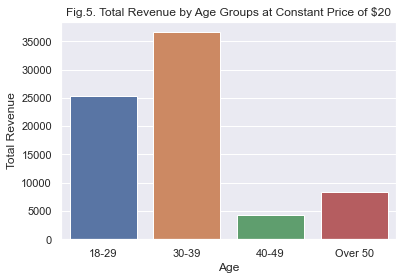

In [27]:
price_opt = 20

Rev_1829 = sum(df['Age_Group']=='18-29')*price_opt
Rev_3039 = sum(df['Age_Group']=='30-39')*price_opt
Rev_4049 = sum(df['Age_Group']=='40-49')*price_opt
Rev_over50 = sum(df['Age_Group']=='Over 50')*price_opt
revenue = [Rev_1829, Rev_3039, Rev_4049, Rev_over50]
age = ['18-29','30-39','40-49','Over 50'] 
sns.barplot(age, revenue)
plt.xlabel('Age')
plt.ylabel('Total Revenue')
plt.title('Fig.5. Total Revenue by Age Groups at Constant Price of $20')
plt.show

## Revenue 18-26 at 20 dollars, over 26 at 30.5 dollars 

<function matplotlib.pyplot.show(close=None, block=None)>

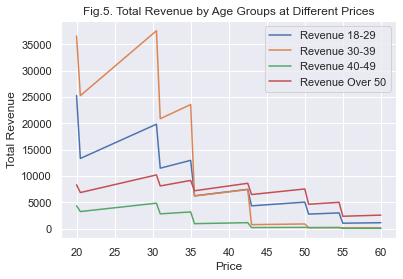

In [28]:
Revenue_18_29 = price_revenue_1829.sort_values('Price')['Revenue']
Revenue_30_39 = price_revenue_3039.sort_values('Price')['Revenue']
Revenue_40_49 = price_revenue_4049.sort_values('Price')['Revenue']
Revenue_40_49 = price_revenue_4049.sort_values('Price')['Revenue']
Revenue_Over_50 = price_revenue_over50.sort_values('Price')['Revenue']

plt.plot(x,Revenue_18_29,label="Revenue 18-29")
plt.plot(x,Revenue_30_39,label="Revenue 30-39")
plt.plot(x,Revenue_40_49,label="Revenue 40-49")
plt.plot(x,Revenue_Over_50,label="Revenue Over 50")
plt.xlabel('Price')
plt.ylabel('Total Revenue')
plt.title('Fig.5. Total Revenue by Age Groups at Different Prices')
plt.legend()
plt.show

Segregating 18-29 further

In [29]:
x = []
y = []
z = []
for i in np.arange(20,60.5,0.5):
    x.append(i)
    y.append(len(df[(df['price']>=i) & (df['Age_Group']=='18-29') & (df['age']>=27)])*i)
    z.append(len(df[(df['price']>=i) & (df['Age_Group']=='18-29') & (df['age']>=27)]))
    
price_revenue_1829 = pd.DataFrame({'Price':x, 'Revenue': y, '# of Cust':z})
price_revenue_1829.sort_values('Revenue',ascending=False).head(5)

,Price,Revenue,# of Cust
21,30.5,4697.0,154
20,30.0,4620.0,154
19,29.5,4543.0,154
0,20.0,4540.0,227
18,29.0,4466.0,154


In [30]:
df['Under 27'] = df['age']<27

price_under27 = 20
price_over27 = 30.5
revenue_under27 = len(df[(df['Under 27']==True)&(df['price']>=price_under27)])*price_under27
revenue_over27 = len(df[(df['Under 27']==False)&(df['price']>=price_over27)])*price_over27
Total_Revenue = revenue_under27 + revenue_over27

print("Total Revenue: $" + str(Total_Revenue) 
      + "\n    - Revenue 18-26 at $20: $" + str(revenue_under27)
      + "\n    - Revenue 27 and Over at $30.5: $" + str(revenue_over27))

Total Revenue: $78150.5
    - Revenue 18-26 at $20: $20780
    - Revenue 27 and Over at $30.5: $57370.5


In [31]:
Rev_1829 = (len(df[(df['age']<27)&(df['price']>=price_under27)])*price_under27) + (len(df[(df['age']>=27)&(df['Age_Group']=='18-29')&(df['price']>=price_over27)])*price_under27)
Rev_3039 = sum((df['Age_Group']=='30-39')&(df['price']>=price_over27))*price_over27
Rev_4049 = sum((df['Age_Group']=='40-49')&(df['price']>=price_over27))*price_over27
Rev_over50 = sum((df['Age_Group']=='Over 50')&(df['price']>=price_over27))*price_over27

print('Revenue of Age_Group 18-29:   $'+str(Rev_1829))
print('Revenue of Age_Group 30-39:   $'+str(Rev_3039))
print('Revenue of Age_Group 40-49:   $'+str(Rev_4049))
print('Revenue of Age_Group Over 50: $'+str(Rev_over50))

Revenue of Age_Group 18-29:   $23860
Revenue of Age_Group 30-39:   $37606.5
Revenue of Age_Group 40-49:   $4849.5
Revenue of Age_Group Over 50: $10217.5


C:\Users\buttb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

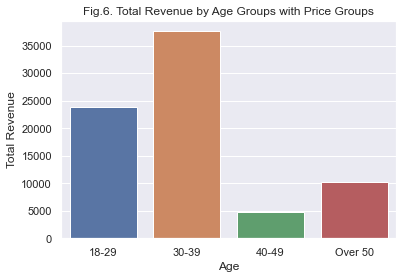

In [32]:
revenue = [Rev_1829, Rev_3039, Rev_4049, Rev_over50]
age = ['18-29','30-39','40-49','Over 50'] 
sns.barplot(age, revenue)
plt.xlabel('Age')
plt.ylabel('Total Revenue')
plt.title('Fig.6. Total Revenue by Age Groups with Price Groups')
plt.show

# Optimization

In [33]:
demand_dist = df.groupby('price')['age'].count()
demand_dist = demand_dist.reset_index(level='price', name='age')
demand_dist.rename(columns = {'age' : 'quantity'}, inplace = True)

In [34]:
demand_dist

,price,quantity
0,20.0,1353
1,30.5,980
2,35.0,817
3,42.5,306
4,50.0,120
5,54.5,89
6,60.0,66


In [35]:
## Linear Demand 

In [36]:
# First argument is the independent variable, others are the function parameters
def linear_fit(p, a, b):
    return a - b * p

In [37]:
# suggested function parameters (any initial hint you may have)
initial_p = [500, 100]

# fit curve
params, cov = optimize.curve_fit(linear_fit, demand_dist["price"], demand_dist["quantity"], initial_p)

# parameters
params

array([2002.82459249,   35.17528939])

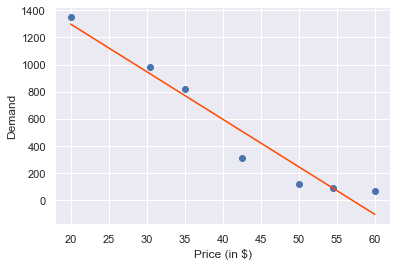

In [38]:
# Plotting all together to see how it looks

a,b = params
y_fit = [ linear_fit(p, a, b) for p in demand_dist["price"]]

plt.plot(demand_dist["price"], y_fit, color="orangered")
plt.scatter( demand_dist["price"], demand_dist["quantity"])
plt.xlabel("Price (in $)")
plt.ylabel("Demand")
plt.show()

In [39]:
###OPTIMIZATION###
#INITIAL GUESS (USE AVERAGE PRICE)
x0 = np.array([45])

###OBJECTIVE FUNCTION###
def objective_func(p,a=2002.825,b=35.175):
    total_revenue=p* (a-b*p)
    return  -1 * total_revenue

###CONSTRAINTS###
def price_constraint1(p):
    return p
cons = ({'type':'ineq', 'fun': price_constraint1})    

###OPTIMIZATION###
sol = minimize(objective_func, x0, method='SLSQP', constraints = cons, bounds = [(20., 60.)])
print(sol.fun)

-28509.651603589184


In [42]:
print(sol.x)

[28.46943783]


In [43]:
# First argument is the independent variable, others are the function parameters
def constant_elasticity_curve(p, c, d):
    return c * (p ** d)

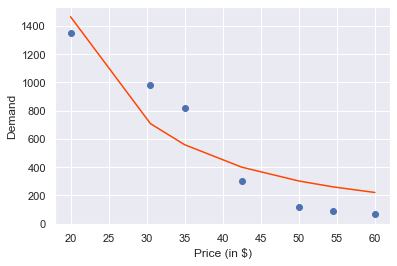

In [44]:
# suggested function parameters (any initial hint you may have)
initial_p = [5, -2]

# fit curve
params, cov = optimize.curve_fit(constant_elasticity_curve, demand_dist["price"], demand_dist["quantity"], initial_p)

# parameters
params

# Plotting all together to see how it looks

a,b = params
y_fit = [ constant_elasticity_curve(p, a, b) for p in demand_dist["price"]]

plt.plot(demand_dist["price"], y_fit, color="orangered")
plt.scatter( demand_dist["price"], demand_dist["quantity"])
plt.xlabel("Price (in $)")
plt.ylabel("Demand")
plt.show()

In [45]:
a,b

(254116.16778278846, -1.7210771032908547)

In [46]:
#INITIAL GUESS (USE AVERAGE PRICE)
x0 = np.array([35])

###OBJECTIVE FUNCTION###
def objective(p, c = 254116.16778278846, d= -1.7210771032908547):
    total_revenue=p* (c * (p ** d))
    return -1 * total_revenue

###CONSTRAINTS###
def price_constraint1(p):
    return p
cons = ({'type':'ineq', 'fun': price_constraint1})    


###OPTIMIZE###
sol = minimize(objective, x0, method='SLSQP', constraints = cons, bounds = [(20, 60)])

print(sol.fun)

-29301.466494264856


In [47]:
print(sol.x)

[20.]


## Segmentation Approach

In [48]:
print('Revenue of Age_Group 18-29:   $'+str(Rev_1829))
print('Revenue of Age_Group 30-39:   $'+str(Rev_3039))
print('Revenue of Age_Group 40-49:   $'+str(Rev_4049))
print('Revenue of Age_Group Over 50: $'+str(Rev_over50))

Revenue of Age_Group 18-29:   $23860
Revenue of Age_Group 30-39:   $37606.5
Revenue of Age_Group 40-49:   $4849.5
Revenue of Age_Group Over 50: $10217.5


In [49]:
#Divide data based on age groups
df1=df[df["age"]<=29]
df2=df[(df["age"]>=30) & (df["age"]<=39)]
df3=df[(df["age"]>=40) & (df["age"]<=49)]
df4=df[(df["age"]>=50)]

In [50]:

demand_dist1 = df1.groupby('price')['age'].count().reset_index(level='price', name='age')
demand_dist1.rename(columns = {'age' : 'quantity'}, inplace = True)

demand_dist2 = df2.groupby('price')['age'].count().reset_index(level='price', name='age')
demand_dist2.rename(columns = {'age' : 'quantity'}, inplace = True)

demand_dist3 = df3.groupby('price')['age'].count().reset_index(level='price', name='age')
demand_dist3.rename(columns = {'age' : 'quantity'}, inplace = True)

demand_dist4 = df4.groupby('price')['age'].count().reset_index(level='price', name='age')
demand_dist4.rename(columns = {'age' : 'quantity'}, inplace = True)

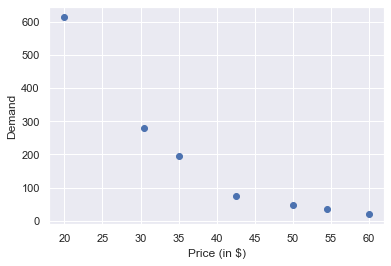

In [51]:
# Scatter plot
# Price and demand
plt.scatter(demand_dist1["price"], demand_dist1["quantity"])
plt.xlabel("Price (in $)")
plt.ylabel("Demand")
plt.show()

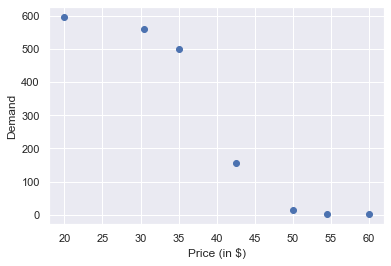

In [52]:
# Scatter plot
# Price and demand
plt.scatter(demand_dist2["price"], demand_dist2["quantity"])
plt.xlabel("Price (in $)")
plt.ylabel("Demand")
plt.show()

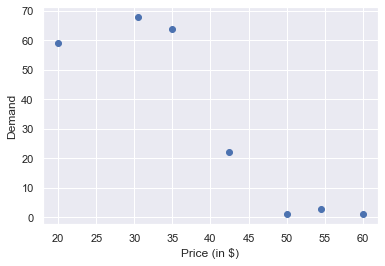

In [53]:
# Scatter plot
# Price and demand
plt.scatter(demand_dist3["price"], demand_dist3["quantity"])
plt.xlabel("Price (in $)")
plt.ylabel("Demand")
plt.show()

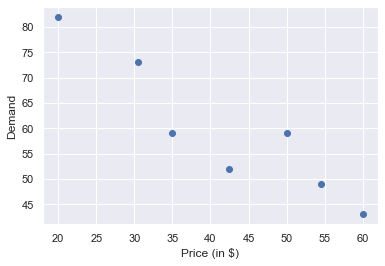

In [54]:
# Scatter plot
# Price and demand
plt.scatter(demand_dist4["price"], demand_dist4["quantity"])
plt.xlabel("Price (in $)")
plt.ylabel("Demand")
plt.show()

### Age 18-29

In [55]:
# First argument is the independent variable, others are the function parameters
def constant_elasticity_curve(p, c, d):
    return c * (p ** d)

In [56]:
# suggested function parameters (any initial hint you may have)
initial_p = [5, -2]

# fit curve
params, cov = optimize.curve_fit(constant_elasticity_curve, demand_dist1["price"], demand_dist1["quantity"], initial_p)

# parameters
params

array([ 7.17966256e+05, -2.35109528e+00])

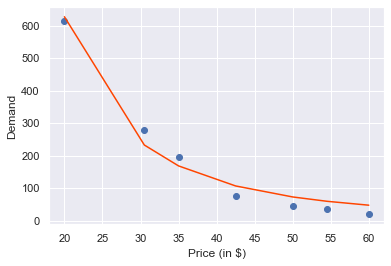

In [57]:
# Plotting all together to see how it looks

a,b = params
y_fit = [ constant_elasticity_curve(p, a, b) for p in demand_dist1["price"]]

plt.plot(demand_dist1["price"], y_fit, color="orangered")
plt.scatter( demand_dist1["price"], demand_dist1["quantity"])
plt.xlabel("Price (in $)")
plt.ylabel("Demand")
plt.show()

In [58]:
a,b

(717966.2558764123, -2.3510952805975993)

In [59]:
#INITIAL GUESS (USE AVERAGE PRICE)
x0 = np.array([35])

###OBJECTIVE FUNCTION###
def objective(p, c =717966.2558764123 , d= -2.3510952805975993):
    total_revenue=p* (c * (p ** d))
    return -1 * total_revenue

###CONSTRAINTS###
def price_constraint1(p):
    return p
cons = ({'type':'ineq', 'fun': price_constraint1})    


###OPTIMIZE###
sol = minimize(objective, x0, method='SLSQP', constraints = cons, bounds = [(20, 60)])

print(sol.fun)

-12539.74040713833


In [62]:
c =717966.2558764123 
d= -2.3510952805975993
p=20
p*(c * (p ** d))

12539.740407378158

In [63]:
print(sol.x)

[20.]


### Age 30-39

In [64]:
# First argument is the independent variable, others are the function parameters
def constant_elasticity_curve(p, c, d):
    return c * (p ** d) 

In [65]:
# suggested function parameters (any initial hint you may have)
initial_p = [1,3]

# fit curve
params, cov = optimize.curve_fit(constant_elasticity_curve, demand_dist2["price"], demand_dist2["quantity"], initial_p)

# parameters
params

array([ 8.15512662e+04, -1.59207974e+00])

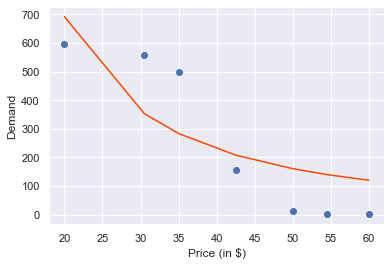

In [66]:
# Plotting all together to see how it looks

c,d= params
y_fit = [ constant_elasticity_curve(p, c, d) for p in demand_dist2["price"]]

plt.plot(demand_dist2["price"], y_fit, color="orangered")
plt.scatter( demand_dist2["price"], demand_dist2["quantity"])
plt.xlabel("Price (in $)")
plt.ylabel("Demand")
plt.show()

In [67]:
c,d

(81551.26617348612, -1.5920797448059414)

In [68]:
#INITIAL GUESS (USE AVERAGE PRICE)
x0 = np.array([35])

###OBJECTIVE FUNCTION###
#Make Revenue Negative so Minimizing means Maximizing Revenue
def objective(p, c = 81553.70431883112, d= -1.5920889971291152):
    total_revenue=p* (c * (p ** d))
    return -1 * total_revenue

###CONSTRAINTS###
def price_constraint1(p):
    return p
cons = ({'type':'ineq', 'fun': price_constraint1})    


###OPTIMIZE###
sol = minimize(objective, x0, method='SLSQP', constraints = cons, bounds = [(20, 60)])

print(sol.fun)

-13839.428201518558


In [69]:
print(sol.x)

[20.]


In [70]:
# Avg price = 45
c = 81553.70431883112
d = -1.5920889971291152
p = 20
c * (p ** d)

691.9714100759279

### Age Group 40-49

In [72]:
# First argument is the independent variable, others are the function parameters
def logit_curve(p,c,a,b):
    return c*np.exp(-(a+b*p))/(1+np.exp(-(a+b*p)))


In [73]:
# suggested function parameters (any initial hint you may have)
initial_p = [1, -2.5, -0.5]

# fit curve
params, cov = optimize.curve_fit(logit_curve, demand_dist3["price"], demand_dist3["quantity"], initial_p)

# parameters
params

C:\Users\buttb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([ 63.66666721, -98.83733011,   2.34061151])

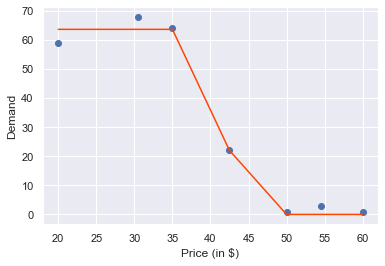

In [74]:
# Plotting all together to see how it looks

c,a,b= params
y_fit = [ logit_curve(p, c, a, b) for p in demand_dist3["price"]]

plt.plot(demand_dist3["price"], y_fit, color="orangered")
plt.scatter( demand_dist3["price"], demand_dist3["quantity"])
plt.xlabel("Price (in $)")
plt.ylabel("Demand")
plt.show()

In [75]:
c,a,b

(63.666667210242764, -98.83733011479555, 2.3406115089787387)

In [76]:
#INITIAL GUESS (USE AVERAGE PRICE)
x0 = np.array([35])

###OBJECTIVE FUNCTION###
#Make Revenue Negative so Minimizing means Maximizing Revenue
def objective(p, c = 63.666667210242764, a=-98.83733011479555,b = 2.3406115089787387):
    total_revenue=p * c*np.exp(-(a+b*p))/(1+np.exp(-(a+b*p)))
    return -1 * total_revenue

###CONSTRAINTS###
def price_constraint1(p):
    return p
cons = ({'type':'ineq', 'fun': price_constraint1})    


###OPTIMIZE###
sol = minimize(objective, x0, method='SLSQP', constraints = cons, bounds = [(20, 60)])

print(sol.fun)

-2537.8817221941695


In [77]:
print(sol.x)

[40.28918054]


### Age Group >50

In [78]:
# First argument is the independent variable, others are the function parameters
def linear_fit(p, a, b):
    return a - b * p

In [79]:
# suggested function parameters (any initial hint you may have)
initial_p = [60, -390.14661787]

# fit curve
params, cov = optimize.curve_fit(linear_fit, demand_dist4["price"], demand_dist4["quantity"], initial_p)

# parameters
params

array([96.97670086,  0.89516891])

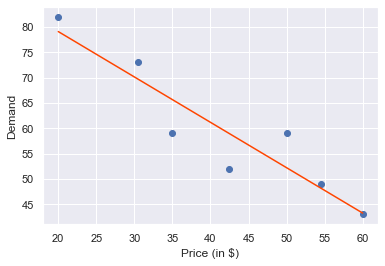

In [80]:
# Plotting all together to see how it looks

a,b= params
y_fit = [ linear_fit(p, a, b) for p in demand_dist4["price"]]

plt.plot(demand_dist4["price"], y_fit, color="orangered")
plt.scatter( demand_dist4["price"], demand_dist4["quantity"])
plt.xlabel("Price (in $)")
plt.ylabel("Demand")
plt.show()

In [81]:
a,b

(96.97670085848625, 0.8951689094338544)

In [82]:
###OBJECTIVE FUNCTION###
def objective_func(p,a=96.97670085848625,b=0.8951689094338544):
    total_revenue=p* (a-b*p)
    return  -1 * total_revenue

###CONSTRAINTS###
def price_constraint1(p):
    return p
cons = ({'type':'ineq', 'fun': price_constraint1})    

###OPTIMIZATION###
sol = minimize(objective_func, x0, method='SLSQP', constraints = cons, bounds = [(20., 60.)])
print(sol.fun)

-2626.454183754005


In [83]:
print(sol.x)

[54.16669962]


# C. Online Vouchers

In [84]:
#Function for Demand
def linear_fit(p, a, b):
    return a - b * p

In [85]:
# suggested function parameters (any initial hint you may have)
initial_p = [500, 100]

# fit curve
params, cov = optimize.curve_fit(linear_fit, demand_dist["price"], demand_dist["quantity"], initial_p)

# parameters
params

array([2002.82459249,   35.17528939])

## Sets

In [92]:
# Number of Customers
customers = list(range(1, len(df)+1))
numcustomers = len(customers)

# Number of Weeks in a Year
weeks = list(range(1,53))
numweeks = len(weeks)

## Parameters

In [93]:
#Use Optimal Price From Part 1
optimal_price = 28.46943783
#Set Voucher Discount
voucher = 0.1
#Set Summar or Winter Discount
summer_winter_sale = 0.15

## Variables

In [96]:
#Apply Discount or Not
yvar = pulp.LpVariable.dict("Vouncher", (customers, weeks), cat=pulp.LpBinary)
#Apply Summer or Winter Discount or Not
svar = pulp.LpVariable.dict("Summer/Winter", (customers, weeks), cat=pulp.LpBinary)
#Apply No Voucher
xvar = pulp.LpVariable.dict("Regular", (customers, weeks), cat=pulp.LpBinary)

In [97]:
model = pulp.LpProblem(name="DiscountModel", sense=pulp.LpMaximize)

## Constraints

In [98]:
# Summer and Winter Vouchers only Received Once
#You can only have one winter and summer voucher
for i in customers:
    model += pulp.lpSum( [svar[(i,t)] for t in weeks] ) == 2  

# You can only receive a voucher or a summer/winter voucher
for i in customers:
    for t in weeks:
        model += yvar[(i,t)] + svar[(i,t)] <= 1  
   

In [99]:
# Cannot give two consecutive vouchers for the same customer. Must be atleast three weeks apart
for i in customers:
    for t in weeks[:49]:
        #Set next three t values must not be greater than 1 for both summer and normal vouchers
        model += yvar[(i,t)] + yvar[(i,t+1)] + yvar[(i,t+2)] + svar[(i,t)] + svar[(i,t+1)] + svar[(i,t+2)] <= 1 
        
# Summer/Winter Vouchers
# Week 24-32 (June to August)
# Week 48-52 & Week 1-8 (December to February)
for i in customers:
    for t in weeks:
        #if the t is not in the summer or winter months then should equal 0
        if t not in list(range(1,9))+ list(range(48,53))  + list(range(24, 33)):          #Set voucher to zero  
            model += svar[(i,t)] == 0 


In [100]:
#If both voucher and summer voucher is zero then regular price
for i in customers:
    for t in weeks:
        if (svar[(i,t)] ==0 and yvar[(i,t)]==0):
            model += xvar[(i,t)] == 1
        else:
            #if one of the vouchers is one then no regular price for that customer at time t
            model += xvar[(i,t)] == 0

#Voucher Restrictions
for i in customers:
    #Must provide atleast five vouchers to not feel abandoned
    model += pulp.lpSum( [yvar[(i,t)] + svar[(i,t)] for t in weeks] ) >= 5
    #Must not provide more than 24 vouchers in a given year
    model += pulp.lpSum( [yvar[(i,t)] + svar[(i,t)] for t in weeks] ) <= 24 

## Objective Function

In [106]:
#Total Revenue using optimal price from Part 1 and for entire year for every customer

obj = pulp.lpSum( [yvar[(i,t)] for t in weeks for i in customers] ) * linear_fit(optimal_price*(1-voucher), *params) / numcustomers + pulp.lpSum( [xvar[(i,t)] for t in weeks for i in customers] ) * linear_fit(optimal_price, *params) / numcustomers + pulp.lpSum( [xvar[(i,t)] for t in weeks for i in customers] ) * linear_fit(optimal_price*(1-summer_winter_sale), *params) / numcustomers

model += obj

C:\Users\buttb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pulp\pulp.py:1537: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [105]:
# yvar
pulp.lpSum( [yvar[(i,t)] for t in weeks for i in customers] ) * linear_fit(optimal_price*(1-voucher), *params) / numcustomers

# xvar
pulp.lpSum( [xvar[(i,t)] for t in weeks for i in customers] ) * linear_fit(optimal_price, *params) / numcustomers

# svar
pulp.lpSum( [xvar[(i,t)] for t in weeks for i in customers] ) * linear_fit(optimal_price*(1-summer_winter_sale), *params) / numcustomers

print("aa")

aa


In [90]:
model.solve()
# markdownModel.solve( pulp.PULP_CBC_CMD(timeLimit=300) )
print("Status:", pulp.LpStatus[model.status])

Status: Optimal


In [91]:
# Total Revenue
totalRev = pulp.value(model.objective)
print("Total Revenue: " + str(totalRev))

Total Revenue: 129581.82007337682


In [94]:
# Print solution
for t in weeks:
    print("Week " + str(t)) 
    n_voucher = 0
    n_summer_winter = 0    
    for i in customers:
        n_voucher = n_voucher + yvar[(i,t)].varValue
        n_summer_winter = n_summer_winter + svar[(i,t)].varValue
    
    #if n_voucher > 0:
    print("\tVoucher for " + str(n_voucher) + " customers")
    #if n_summer_winter > 0:
    print("\tSummer/Winter voucher for " + str(n_summer_winter) + " customers")

Week 1
	Voucher for 3706.0 customers
	Summer/Winter voucher for 4.0 customers
Week 2
	Voucher for 0.0 customers
	Summer/Winter voucher for 1.0 customers
Week 3
	Voucher for 20.0 customers
	Summer/Winter voucher for 0.0 customers
Week 4
	Voucher for 1429.0 customers
	Summer/Winter voucher for 1249.0 customers
Week 5
	Voucher for 561.0 customers
	Summer/Winter voucher for 206.0 customers
Week 6
	Voucher for 241.0 customers
	Summer/Winter voucher for 45.0 customers
Week 7
	Voucher for 1225.0 customers
	Summer/Winter voucher for 950.0 customers
Week 8
	Voucher for 601.0 customers
	Summer/Winter voucher for 338.0 customers
Week 9
	Voucher for 617.0 customers
	Summer/Winter voucher for 0.0 customers
Week 10
	Voucher for 1963.0 customers
	Summer/Winter voucher for 0.0 customers
Week 11
	Voucher for 1137.0 customers
	Summer/Winter voucher for 0.0 customers
Week 12
	Voucher for 631.0 customers
	Summer/Winter voucher for 0.0 customers
Week 13
	Voucher for 1792.0 customers
	Summer/Winter voucher 

## Changing Discount

In [104]:
optimal_price = 28.46943783
voucher = 0.2
summer_winter_sale = 0.25

In [107]:
model.solve()
# markdownModel.solve( pulp.PULP_CBC_CMD(timeLimit=300) )
print("Status:", pulp.LpStatus[model.status])

Status: Optimal


In [110]:
# Total Revenue
totalRev = pulp.value(model.objective)
print("Total Revenue: " + str(totalRev))

Total Revenue: 136391.4809322179


In [109]:
# Print solution
for t in weeks:
    print("Week " + str(t)) 
    n_voucher = 0
    n_summer_winter = 0    
    for i in customers:
        n_voucher = n_voucher + yvar[(i,t)].varValue
        n_summer_winter = n_summer_winter + svar[(i,t)].varValue
    
    #if n_voucher > 0:
    print("\tVoucher for " + str(n_voucher) + " customers")
    #if n_summer_winter > 0:
    print("\tSummer/Winter voucher for " + str(n_summer_winter) + " customers")

Week 1
	Voucher for 3701.0 customers
	Summer/Winter voucher for 7.0 customers
Week 2
	Voucher for 1.0 customers
	Summer/Winter voucher for 3.0 customers
Week 3
	Voucher for 19.0 customers
	Summer/Winter voucher for 0.0 customers
Week 4
	Voucher for 1429.0 customers
	Summer/Winter voucher for 1202.0 customers
Week 5
	Voucher for 585.0 customers
	Summer/Winter voucher for 215.0 customers
Week 6
	Voucher for 250.0 customers
	Summer/Winter voucher for 50.0 customers
Week 7
	Voucher for 1231.0 customers
	Summer/Winter voucher for 941.0 customers
Week 8
	Voucher for 601.0 customers
	Summer/Winter voucher for 341.0 customers
Week 9
	Voucher for 617.0 customers
	Summer/Winter voucher for 0.0 customers
Week 10
	Voucher for 1961.0 customers
	Summer/Winter voucher for 0.0 customers
Week 11
	Voucher for 1137.0 customers
	Summer/Winter voucher for 0.0 customers
Week 12
	Voucher for 633.0 customers
	Summer/Winter voucher for 0.0 customers
Week 13
	Voucher for 1781.0 customers
	Summer/Winter voucher 